In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Unique values in each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


## Data Cleaning

In [10]:
# Item_Fat_Content classes are not organized
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [11]:
# Mapping a dictionary to map all the fat types into low or regular.
item_fat = {'Low Fat':'low', 'Regular':'regular', 'LF':'low', 'reg':'regular','low fat':'low'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].map(item_fat)
dftest['Item_Fat_Content'] = dftest['Item_Fat_Content'].map(item_fat)
print(df['Item_Fat_Content'].unique())  # All classes are now changed into low or regular.

['low' 'regular']


## Treating Missing Values

In [12]:
# Null Values in terms of percentage
df.isnull().sum() / df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### Item Pre Processing

low        951
regular    512
Name: Item_Fat_Content, dtype: int64


C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


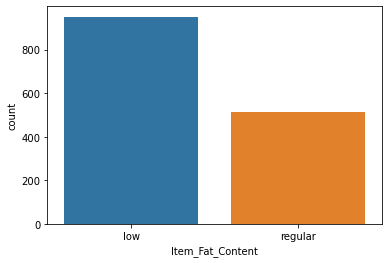

In [13]:
# Null values based on 'Item_Fat_Content'
print(df[ df['Item_Weight'].isnull() ]['Item_Fat_Content'].value_counts())

sns.countplot(df[ df['Item_Weight'].isnull() ]['Item_Fat_Content'])
plt.show()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64


C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


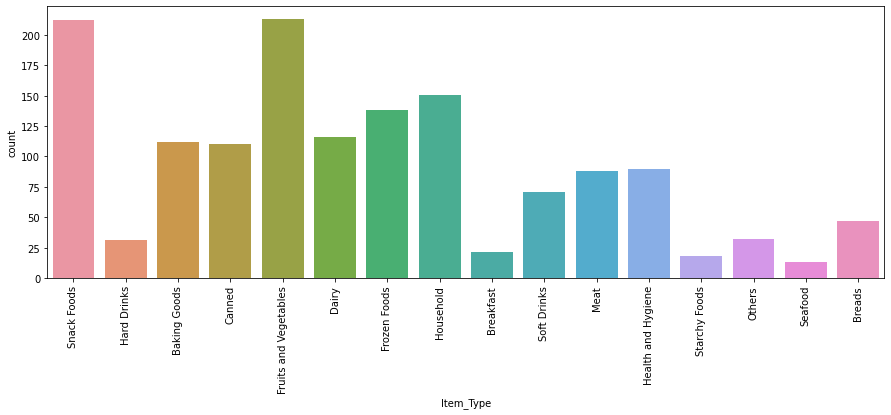

In [14]:
# Null values based on 'Item_Fat_Content'
print(df[ df['Item_Weight'].isnull() ]['Item_Type'].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(df[ df['Item_Weight'].isnull() ]['Item_Type'])
plt.xticks(rotation=90)
plt.show()

In [15]:
# Creating an array for those unique item_identifier which are having null values.
item_having_null = df[df['Item_Weight'].isnull()]['Item_Identifier'].unique()

# Showing products from those item_identifier which have missing values.
df[ df['Item_Identifier'].isin(item_having_null)].sort_values(by='Item_Identifier', ascending=True).head(5)

#  Item_weight and item_mrp is correlated for each item_identifier

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4900,DRA24,19.35,regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228
1148,DRA24,19.35,regular,0.040154,Soft Drinks,164.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076
4130,DRA24,19.35,regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
4416,DRA24,NaN,regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040
6863,DRA24,19.35,regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208


In [16]:
# Creating a new column called Item_MRP_per_unit weight

df.insert(6,'Item_MRP_per_unit_weight',float )
df['Item_MRP_per_unit_weight'] = df['Item_MRP']/df['Item_Weight']

dftest.insert(6,'Item_MRP_per_unit_weight',float )
dftest['Item_MRP_per_unit_weight'] = dftest['Item_MRP']/dftest['Item_Weight']

df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_MRP_per_unit_weight,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low,0.016047,Dairy,249.8092,26.861204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,8.153581,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low,0.016760,Meat,141.6180,8.092457,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,9.484115,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low,0.000000,Household,53.8614,6.031512,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
# Bifurcating all the item columns with outlet columns
item_train = df.iloc[:,:7]
outlet_train = df.iloc[:,7:-1]

item_test = dftest.iloc[:,:7]
outlet_test = dftest.iloc[:,7:]

In [18]:
# Imputing all the missing Item_MRP_per_unit_weight with mean value of the grouped by Item_Identifier

In [19]:
# Creating a dataframe which contains all the item_identifier and item_mrp_per_unit_weight
item_train_mean_mrp = item_train[['Item_Identifier','Item_MRP_per_unit_weight']]
item_train_mean_mrp = item_train_mean_mrp.groupby(by='Item_Identifier').mean()
item_train_mean_mrp['Item_MRP_per_unit_weight']

Item_Identifier
DRA12    12.229776
DRA24     8.470636
DRA59    22.338863
DRB01    25.622869
DRB13    31.020932
           ...    
NCZ30    18.294355
NCZ41     6.328987
NCZ42    22.537600
NCZ53    19.562125
NCZ54    11.068614
Name: Item_MRP_per_unit_weight, Length: 1559, dtype: float64

In [20]:
# Creating new column to specify whether item_weight contains null value or not for a record
item_train['MRP_null'] = item_train['Item_MRP_per_unit_weight'].isnull()
item_test['MRP_null'] = item_test['Item_MRP_per_unit_weight'].isnull()

print(item_train['MRP_null'].value_counts()) , print(item_test['MRP_null'].value_counts())

False    7060
True     1463
Name: MRP_null, dtype: int64
False    4705
True      976
Name: MRP_null, dtype: int64


(None, None)

In [21]:
for i in range(item_train.shape[0]):
    e = item_train.iloc[i,0]
    if item_train.iloc[i,-1] == True:
        item_train.loc[i, 'Item_MRP_per_unit_weight'] =  item_train_mean_mrp['Item_MRP_per_unit_weight'][e]

for i in range(item_test.shape[0]):
    e = item_test.iloc[i,0]
    if item_test.iloc[i,-1] == True:
        item_test.loc[i, 'Item_MRP_per_unit_weight'] =  item_train_mean_mrp['Item_MRP_per_unit_weight'][e]

In [22]:
# Item_MRP_per_unit_weight is filled with average Item_MRP_per_unit_weight value based on Item_Identifier
item_train[item_train['Item_Identifier'] == 'DRI11']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_MRP_per_unit_weight,MRP_null
18,DRI11,NaN,low,0.034238,Hard Drinks,113.2834,13.949564,True
1366,DRI11,NaN,low,0.060237,Hard Drinks,115.9834,13.949564,True
3127,DRI11,8.26,low,0.034458,Hard Drinks,113.3834,13.726804,False
5310,DRI11,8.26,low,0.057586,Hard Drinks,113.7834,13.775230,False
7022,DRI11,8.26,low,0.034398,Hard Drinks,115.7834,14.017361,False
7192,DRI11,8.26,low,0.034544,Hard Drinks,116.0834,14.053680,False
8483,DRI11,8.26,low,0.034474,Hard Drinks,117.0834,14.174746,False


In [23]:
# Item_weight would be equal to Item_MRP / Item_MRP_per_unit_weight
item_train.loc[ item_train['Item_Weight'].isnull() , 'Item_Weight'] = item_train['Item_MRP']/item_train['Item_MRP_per_unit_weight']
item_test.loc[ item_test['Item_Weight'].isnull() , 'Item_Weight'] = item_test['Item_MRP']/item_test['Item_MRP_per_unit_weight']

In [24]:
# Still Some items are having null values, because they were the only record with respect to Item_Identifier
# and thats why group mean did not imputed null values. For these we will use KNN imputation
item_train.loc[ item_train['Item_Weight'].isnull() ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_MRP_per_unit_weight,MRP_null
927,FDN52,NaN,regular,0.130933,Frozen Foods,86.9198,NaN,True
1922,FDK57,NaN,low,0.079904,Snack Foods,120.0440,NaN,True
4187,FDE52,NaN,regular,0.029742,Dairy,88.9514,NaN,True
5022,FDQ60,NaN,regular,0.191501,Baking Goods,121.2098,NaN,True


In [25]:
item_train_knn = item_train[['Item_Weight','Item_Visibility','Item_MRP']]
item_test_knn = item_test[['Item_Weight','Item_Visibility','Item_MRP']]

In [26]:
# Scaling of the numerical data
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
item_train_knn = pd.DataFrame( st.fit_transform(item_train_knn), columns=item_train_knn.columns )
item_test_knn = pd.DataFrame(st.transform(item_test_knn), columns=item_test_knn.columns)

In [27]:
# KNN imputation of the data
from sklearn.impute import KNNImputer
knn = KNNImputer()
item_train_knn = pd.DataFrame(knn.fit_transform(item_train_knn), columns=item_train_knn.columns)
item_test_knn = pd.DataFrame(knn.transform(item_test_knn), columns=item_test_knn.columns)

In [28]:
item_train_knn.isnull().sum()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64

In [29]:
item_train = item_train.drop(columns=['Item_MRP_per_unit_weight','MRP_null'])
item_train[item_train_knn.columns] = item_train_knn
item_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
0,FDA15,-0.769651,low,-0.970732,Dairy,1.747454
1,DRC01,-1.497267,regular,-0.908111,Soft Drinks,-1.489023
2,FDN15,0.995570,low,-0.956917,Meat,0.010040
3,FDX07,1.361531,regular,-1.281758,Fruits and Vegetables,0.660050
4,NCD19,-0.849302,low,-1.281758,Household,-1.399220


In [30]:
item_test = item_test.drop(columns=['Item_MRP_per_unit_weight','MRP_null'])
item_test[item_test_knn.columns] = item_test_knn
item_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
0,FDW58,1.695201,low,-1.135138,Snack Foods,-0.532035
1,FDW14,-0.984922,regular,-0.536960,Dairy,-0.861920
2,NCN55,0.371284,low,0.648183,Others,1.618094
3,FDQ58,-1.196964,low,-0.983503,Snack Foods,0.225484
4,FDY38,0.182817,regular,1.016910,Dairy,1.497272


### Outlet Preprocessing

In [31]:
outlet_train.isnull().sum()

Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [32]:
outlet_train.isnull().sum()/outlet_train.shape[0]*100

Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


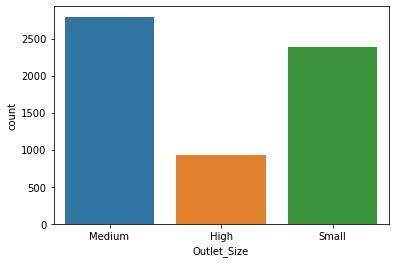

In [33]:
outlet_train['Outlet_Size'].value_counts()

sns.countplot(outlet_train['Outlet_Size'])
plt.show()

In [34]:
outlet_train['outlet_null'] = outlet_train['Outlet_Size'].isnull()
outlet_test['outlet_null'] = outlet_test['Outlet_Size'].isnull()

In [35]:
# All the records and null values grouped by outlet_type, outlet_location_type, establishment year
outlet_train.drop(columns=['Outlet_Identifier']).groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Establishment_Year']).count()

# We can see some particular pattern is present for the missing values.
# Only Grocery store in Tier 3 data is missing
# and Supermarket Type1 in Tier 2 data is missing

Outlet_Size  \
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year                
Grocery Store     Tier 1               1985                               528   
                  Tier 3               1998                                 0   
Supermarket Type1 Tier 1               1997                               930   
                                       1999                               930   
                  Tier 2               2002                                 0   
                                       2004                               930   
                                       2007                                 0   
                  Tier 3               1987                               932   
Supermarket Type2 Tier 3               2009                               928   
Supermarket Type3 Tier 3               1985                               935   

                                                                  outlet_null  
Outlet_Type       Outlet_Location_Type Outlet_Establishment_Year               
Grocery Store     Tier 1               1985                               528  
                  Tier 3               1998                               555  
Supermarket Type1 Tier 1               1997                               930  
                                       1999                               930  
                  Tier 2               2002                               929  
                                       2004                               930  
                                       2007                               926  
                  Tier 3               1987                               932  
Supermarket Type2 Tier 3               2009                               928  
Supermarket Type3 Tier 3               1985                               935

In [36]:
# All the missing outlet_size values are belongs to come particular outler_identifier
outlet_train.groupby(by='Outlet_Identifier').count()

# Those missing values are actually belongs to particular outlet_identifier
# only 3 outlet_identifier is having missing values i.e. OUT010, OUT017 and OUT045

,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,outlet_null
Outlet_Identifier,,,,,
OUT010,555,0,555,555,555
OUT013,932,932,932,932,932
OUT017,926,0,926,926,926
OUT018,928,928,928,928,928
OUT019,528,528,528,528,528
OUT027,935,935,935,935,935
OUT035,930,930,930,930,930
OUT045,929,0,929,929,929
OUT046,930,930,930,930,930


In [37]:
# Every outlet description
outlet_train[ outlet_train.duplicated() == False ].sort_values(by='Outlet_Identifier')

# For OUT017 and OUT045 both belongs to Tier2 and Supermarket Type1. We can inpute the missing values with Small
# since for OUT035, also belongs to Tier2 and Supermarket Type1 and have 'Small' outlet size.

# For 'OUT010', imputing it with 'Small' since grocery store would be smaller in size as compared to supermarkets

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,outlet_null
3,OUT010,1998,NaN,Tier 3,Grocery Store,True
4,OUT013,1987,High,Tier 3,Supermarket Type1,False
9,OUT017,2007,NaN,Tier 2,Supermarket Type1,True
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,False
23,OUT019,1985,Small,Tier 1,Grocery Store,False
7,OUT027,1985,Medium,Tier 3,Supermarket Type3,False
19,OUT035,2004,Small,Tier 2,Supermarket Type1,False
8,OUT045,2002,NaN,Tier 2,Supermarket Type1,True
11,OUT046,1997,Small,Tier 1,Supermarket Type1,False
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,False


In [38]:
# Imputing outlet size with 'Small'
outlet_train.loc[ (outlet_train['Outlet_Size'].isnull()) , 'Outlet_Size' ] = 'Small'

In [39]:
outlet_train = outlet_train.drop(columns=['outlet_null'])
outlet_test = outlet_test.drop(columns=['outlet_null'])

### Joining Item /Outlet

In [40]:
y = df['Item_Outlet_Sales']

In [41]:
x = pd.concat([item_train, outlet_train], axis=1)
x.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,-0.769651,low,-0.970732,Dairy,1.747454,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,-1.497267,regular,-0.908111,Soft Drinks,-1.489023,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,0.995570,low,-0.956917,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [42]:
test = pd.concat([item_test, outlet_test], axis=1)
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,1.695201,low,-1.135138,Snack Foods,-0.532035,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,-0.984922,regular,-0.536960,Dairy,-0.861920,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,0.371284,low,0.648183,Others,1.618094,OUT010,1998,NaN,Tier 3,Grocery Store


## EDA

In [43]:
df1 = pd.concat([x,y], axis=1)

In [44]:
df1.shape

(8523, 12)

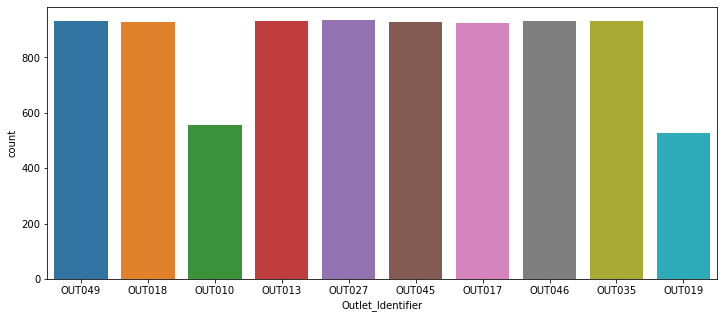

In [45]:
# Number of sales by outlet_identifier
plt.figure(figsize=(12,5))
sns.countplot(x = df1['Outlet_Identifier'])
plt.show()

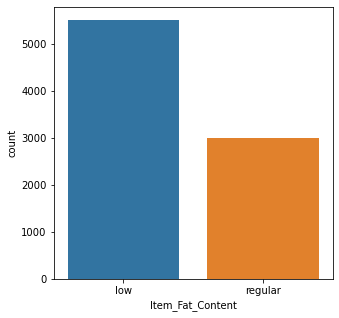

In [46]:
# Number of sales by Fat_count
plt.figure(figsize=(5,5))
sns.countplot(x = df1['Item_Fat_Content'])
plt.show()

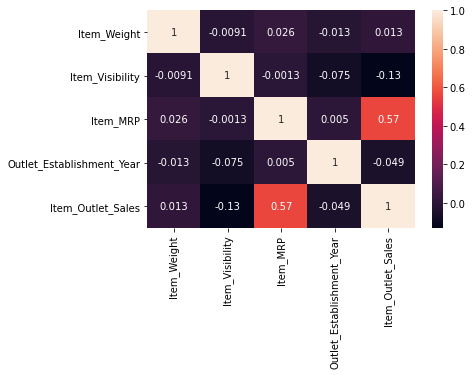

In [47]:
# Checking correlation
sns.heatmap( df1.corr(), annot=True )
plt.show()

In [48]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

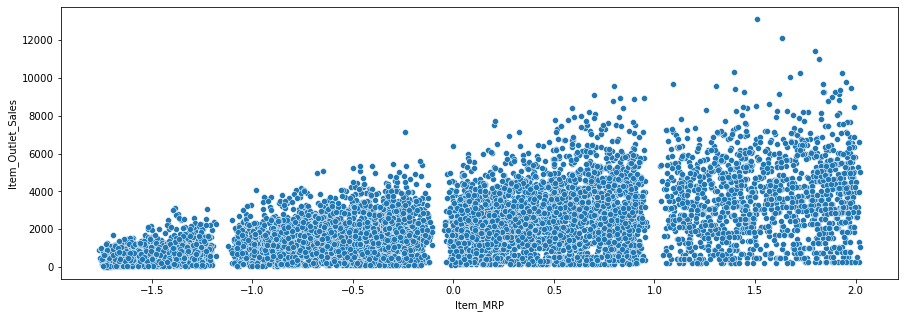

In [49]:
# We can see item_mrp is aving mild positive correlaton with item_outlet_sales
plt.figure(figsize=(15,5))
sns.scatterplot(x = df1['Item_MRP'], y = df1['Item_Outlet_Sales'])
plt.show()

# As the MRP is high, Sales is also getting higher.

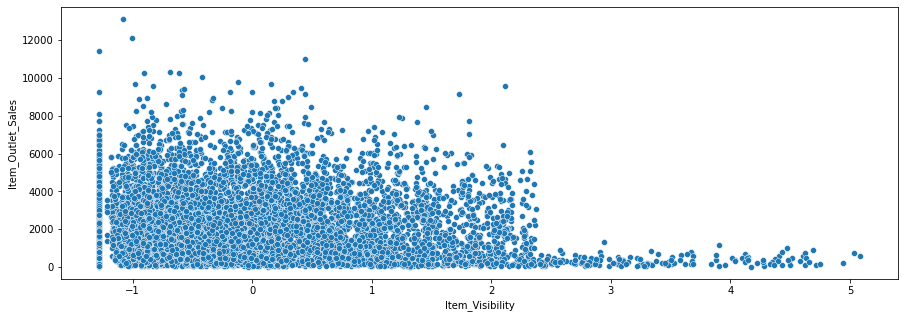

In [50]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df1['Item_Visibility'], y = df1['Item_Outlet_Sales'])
plt.show()

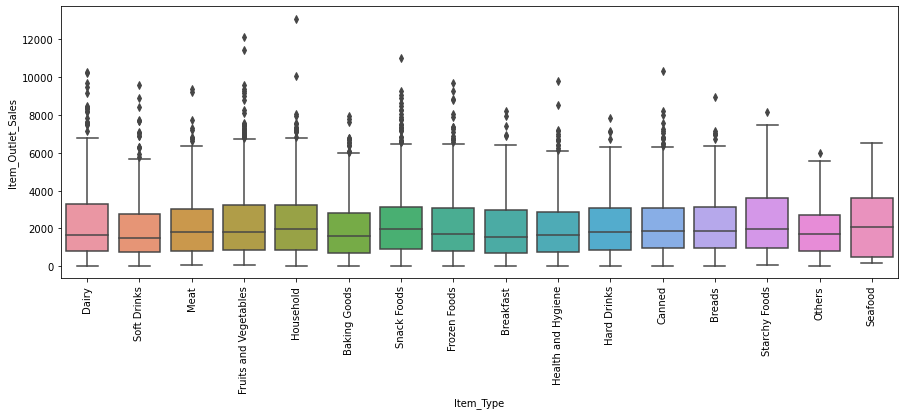

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df1)
plt.xticks(rotation=90)
plt.show()

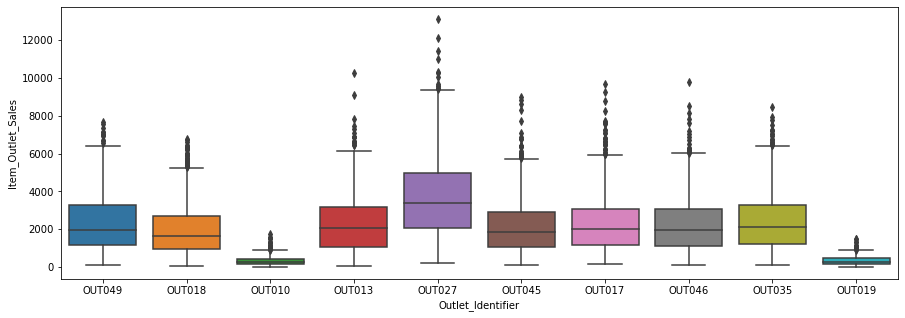

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df1)
plt.show()

## One Hot Encoding

In [53]:
# Removing Unique columns i.e, Item_Identifier
x = x.drop(columns=['Item_Identifier'])
test = test.drop(columns=['Item_Identifier'])

In [54]:
# Chaning outlet_establishment_year to numerical by changing it to how long it was operating.
x['Outlet_Establishment_Year'] = x['Outlet_Establishment_Year'].apply(lambda x : 2020-x)

st = StandardScaler()

x['Outlet_Establishment_Year'] = st.fit_transform(x[['Outlet_Establishment_Year']])

test['Outlet_Establishment_Year'] = test['Outlet_Establishment_Year'].apply(lambda x : 2020-x)
test['Outlet_Establishment_Year'] = st.transform(test[['Outlet_Establishment_Year']])

In [55]:
# Since Outlet size is ordinal to changing it to -1, 0 and 1 for small , medium and high
x['Outlet_Size'] = x['Outlet_Size'].map({'Small':-1, 'Medium':0, 'High':1})
test['Outlet_Size'] = test['Outlet_Size'].map({'Small':-1, 'Medium':0, 'High':1})

In [56]:
def f1(data):
    num_data = data.select_dtypes(include=np.number)
    cat_data = data.select_dtypes(exclude=np.number)
    
    cat_data = pd.get_dummies(cat_data, drop_first=True)
    data = pd.concat([num_data, cat_data], axis=1, )
    return data

In [57]:
x = f1(x)
test = f1(test)

In [58]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.769651,-0.970732,1.747454,-0.139541,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,-1.497267,-0.908111,-1.489023,-1.334103,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,0.995570,-0.956917,0.010040,-0.139541,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1.361531,-1.281758,0.660050,-0.020085,-1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.849302,-1.281758,-1.399220,1.293934,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


## Train Test Split

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=16)

## Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [61]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)

ytrain_pred = lr.predict(xtrain)
ytest_pred = lr.predict(xtest)

print(r2_score(ytrain, ytrain_pred))
print(mean_squared_error(ytrain, ytrain_pred)**0.5)

print(r2_score(ytest, ytest_pred))
print(mean_squared_error(ytest, ytest_pred)**0.5)

0.5640272328170584
1136.4989017854568
0.5602195546144177
1107.6970789105196


## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

In [63]:
dtree = DecisionTreeRegressor() # estimator


param_dist = {'max_depth':sp_randint(1,20),
             'min_samples_leaf':sp_randint(1,50),
              'min_samples_split':sp_randint(2,50)}


rsearch  = RandomizedSearchCV(dtree, param_distributions = param_dist,scoring='neg_mean_squared_error', cv=4) 

rsearch.fit(x,y)
rsearch.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 30}

In [64]:
dtree_rand_tuned = DecisionTreeRegressor(**rsearch.best_params_)
dtree_rand_tuned.fit(xtrain,ytrain)


ytrain_pred = dtree_rand_tuned.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)**0.5 )
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))


ytest_pred = dtree_rand_tuned.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred)**0.5 )
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

RMSE on train data:  1067.854759025516
R^2 on train data:  0.6151019628844532
RMSE on test data:  1085.797090039382
R^2 on test data:  0.5774372203546576


## Extra Tree Regressor

In [65]:
from sklearn.ensemble import ExtraTreesRegressor

In [66]:
etr = ExtraTreesRegressor()


param_dist = { 'n_estimators':sp_randint(50,100),
              'max_features': sp_randint(1,25),
              'max_depth' : sp_randint(5,20),
             'min_samples_leaf':sp_randint(10,50),
              'min_samples_split':sp_randint(2,50)}


rsearch_etr  = RandomizedSearchCV(estimator=etr, param_distributions = param_dist,scoring='neg_mean_squared_error',
                                  cv=4, random_state=4) 

rsearch_etr.fit(x,y)
rsearch_etr.best_params_

{'max_depth': 19,
 'max_features': 24,
 'min_samples_leaf': 46,
 'min_samples_split': 46,
 'n_estimators': 88}

In [67]:
etr_tuned = ExtraTreesRegressor(**rsearch_etr.best_params_)
etr_tuned.fit(xtrain, ytrain)

ytrain_pred = etr_tuned.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)**0.5) 
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))

ytest_pred = etr_tuned.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred)**0.5)
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

RMSE on train data:  1067.1938717131904
R^2 on train data:  0.615578236482462
RMSE on test data:  1052.7422717804345
R^2 on test data:  0.6027736792164813


## Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf = RandomForestRegressor()


param_dist = { 'n_estimators':sp_randint(100,150),
              'max_features': sp_randint(1,10),
              'max_depth' : sp_randint(5,20),
             'min_samples_leaf':sp_randint(10,50),
              'min_samples_split':sp_randint(2,50)}


rsearch_rf  = RandomizedSearchCV(estimator=rf, param_distributions = param_dist,scoring='neg_mean_squared_error',
                                 cv=4, random_state=16) 

rsearch_rf.fit(x,y)
rsearch_rf.best_params_

{'max_depth': 19,
 'max_features': 9,
 'min_samples_leaf': 26,
 'min_samples_split': 10,
 'n_estimators': 121}

In [70]:
rf= RandomForestRegressor(**rsearch_rf.best_params_)

rf.fit(xtrain, ytrain)

ytrain_pred = rf.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)**0.5 )
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))


ytest_pred = rf.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred)**0.5 )
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

RMSE on train data:  1069.1387217677393
R^2 on train data:  0.6141758222479398
RMSE on test data:  1072.8198501490588
R^2 on test data:  0.5874776386798242


## Gradient Boost

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
gbr = GradientBoostingRegressor(criterion='mse')
gbr.fit(xtrain, ytrain)

ytrain_pred = gbr.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)**0.5 )
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))


ytest_pred = gbr.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred)**0.5 )
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

RMSE on train data:  1035.2101219755218
R^2 on train data:  0.6382751536539546
RMSE on test data:  1064.795624146686
R^2 on test data:  0.5936255363566236


## LightGBM

In [73]:
import lightgbm as lgb

In [74]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

lgbmc = lgb.LGBMRegressor()

params = {
    'n_estimators': sp_randint(100, 200),
    'learning_rate': sp_uniform(0, 0.5),
    'max_depth': sp_randint(1, 15),
    'num_leaves': sp_randint(10, 50)}

rsearch_lg = RandomizedSearchCV(lgbmc, param_distributions=params, cv=4, n_iter=50,scoring='neg_mean_squared_error',
                                random_state=4)

rsearch_lg.fit(x, y)

RandomizedSearchCV(cv=4, estimator=LGBMRegressor(), n_iter=50,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000251EF8003C8>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000251EF800CC8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000251EF800948>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000251EF7C9148>},
                   random_state=4, scoring='neg_mean_squared_error')

In [75]:
lgbr = lgb.LGBMRegressor(**rsearch_lg.best_params_, random_state=4)  


lgbr.fit(xtrain, ytrain)

ytrain_pred = lgbr.predict(xtrain)
ytest_pred = lgbr.predict(xtest)


ytrain_pred = rf.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)**0.5 )
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))


ytest_pred = rf.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred)**0.5 )
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

RMSE on train data:  1069.1387217677393
R^2 on train data:  0.6141758222479398
RMSE on test data:  1072.8198501490588
R^2 on test data:  0.5874776386798242


## Stacking Model

In [76]:
from sklearn.ensemble import VotingRegressor

In [77]:
rf_tuned = RandomForestRegressor(**rsearch_rf.best_params_)
etr_tuned = ExtraTreesRegressor(**rsearch_etr.best_params_)
lgbr = lgb.LGBMRegressor(**rsearch_lg.best_params_)
gbr = GradientBoostingRegressor(criterion='mse')

In [78]:
estimators = [('rf_tuned', rf_tuned),('etr_tuned',etr_tuned),('lgbr', lgbr), ('gbr',gbr)]

stack1 = VotingRegressor(estimators=estimators)

stack1.fit(xtrain, ytrain)

ytrain_pred = stack1.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)**0.5) 
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))

ytest_pred = stack1.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred)**0.5)
print('R^2 on test data: ', r2_score(ytest, ytest_pred))


RMSE on train data:  1044.6397594698788
R^2 on train data:  0.6316553012202342
RMSE on test data:  1056.1940843769303
R^2 on test data:  0.6001644959964112
